In [1]:
from DiceTowerVision import *

file_template = "Images\\Templates\\DDR# (A) (FV#).jpg"
background_file_template = "Images\\Calibration\\background (*).jpg"
background_images_RGB = get_mactching_images_RGB(background_file_template,log_level=LOG_LEVEL_INFO)
roi_mask = get_roi_mask_from_bg_images(background_images_RGB,range=(0,10), filter=25, dilation=5, log_level=LOG_LEVEL_INFO)
camera_matrix = get_intrinsic_camera_matrix_from_image(roi_mask, DiceTower.FOCAL_LENGTH, DiceTower.PIXEL_SIZE)

In [ ]:
name=10
rank, start, step = Die.get_common_die_info(name)
value = 4
imaging_settings = dict()
imaging_settings["number_brightness"] = 255

file_path = file_template
file_path = file_path.replace("DR#",str(name))
file_path = file_path.replace("FV#",str(value))
file_path = file_path.replace("*","A")
image_RGB = cv.cvtColor(cv.imread(file_path), cv.COLOR_BGR2RGB)
die_face_sample = DieFaceSample.create_from_image(image_RGB,Die.get_common_die_geometry(rank),imaging_settings, roi_mask=roi_mask,log_level=LOG_LEVEL_VERBOSE)
die_image_HLS = cv.cvtColor(die_face_sample.image, cv.COLOR_RGB2HLS)
plt.imshow(die_image_HLS[:,:,0],cmap='gray')
plt.show()
plt.imshow(die_image_HLS[:,:,2],cmap='gray')
plt.show()
plt.imshow(die_image_HLS[:,:,1],cmap='gray')
plt.show()

In [ ]:
name=10
rank, start, step = Die.get_common_die_info(name)
value = 1
imaging_settings = dict()
imaging_settings["number_brightness"] = 255

file_path = file_template
file_path = file_path.replace("DR#",str(name))
file_path = file_path.replace("FV#",str(value))
die_face = DieFace.create_from_image_file_template(file_path,value,Die.get_common_die_geometry(rank), imaging_settings,roi_mask=roi_mask,log_level=LOG_LEVEL_INFO)
for s in die_face.samples:
    s.view_keypoints(imaging_settings=imaging_settings)
    s.view_geometry()
    s.view_moments()

In [ ]:
value = 1
for name in [4,6,8,10,12,20,100]:
    rank, start, step = Die.get_common_die_info(name)

    print("NAME: %i"%name)
    file_path = file_template
    file_path = file_path.replace("DR#",str(name))
    file_path = file_path.replace("FV#",str(value))
    die_face = DieFace.create_from_image_file_template(file_path,value,Die.get_common_die_geometry(rank),roi_mask=roi_mask, log_level=LOG_LEVEL_INFO)
    for s in die_face.samples:
        s.view_keypoints()
        s.view_geometry()

In [ ]:
name=12

file_path = file_template
file_path = file_path.replace("DR#",str(name))
die = Die.create_common_die_from_images(file_path,name,roi_mask=roi_mask, log_level=LOG_LEVEL_WARN)
print(die.calculate_imaging_settings(LOG_LEVEL_DEBUG))
face_comparison_scores, _ = die.compare_faces(camera_matrix=camera_matrix, log_level=LOG_LEVEL_INFO)
hu_moments = die.compare_hu_moments(log_level=LOG_LEVEL_VERBOSE)
z_moments = die.compare_zernike_moments(log_level=LOG_LEVEL_VERBOSE)
plt.plot(face_comparison_scores)
plt.title("Scores when comparing samples of different faces")
plt.show()
for f in die.faces.values():
    sample_comparison_scores = np.array(f.compare_samples())
    if len(sample_comparison_scores) > 0:
        plt.plot(np.arange(0,len(sample_comparison_scores)), sample_comparison_scores)
plt.title("Scores when comparing samples of the same face")
plt.show()

20: Hue [177, 7] ; Brightness [156, 156]


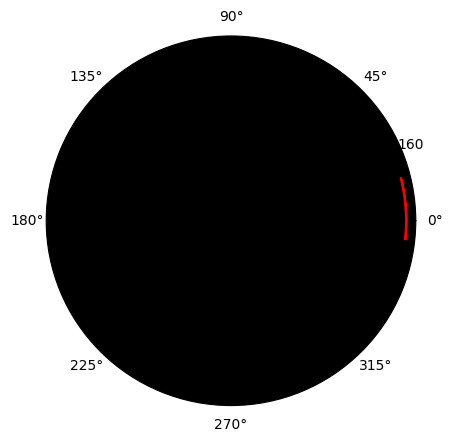

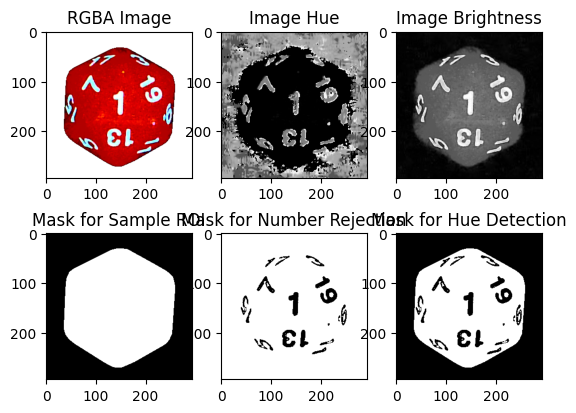

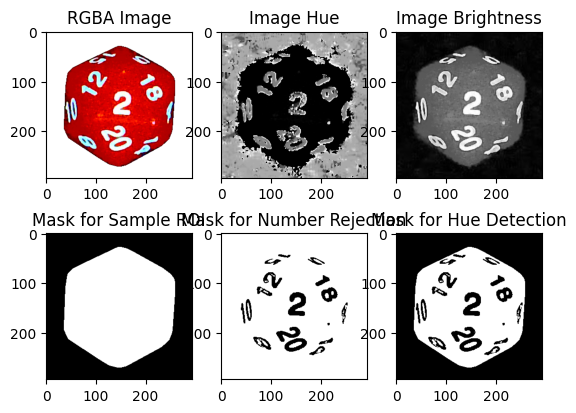

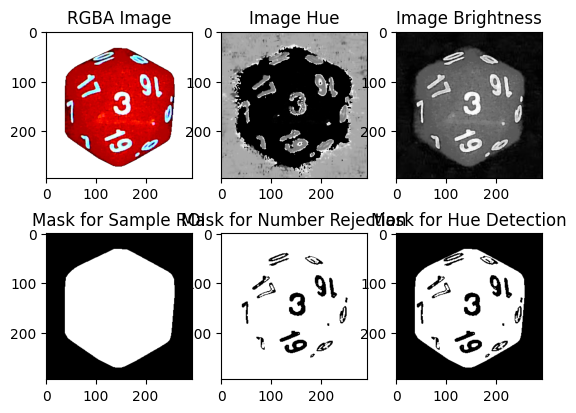

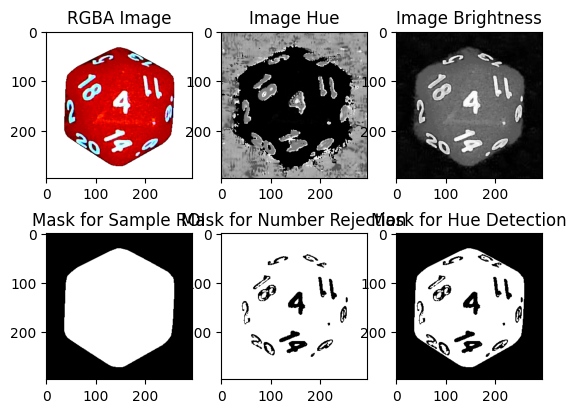

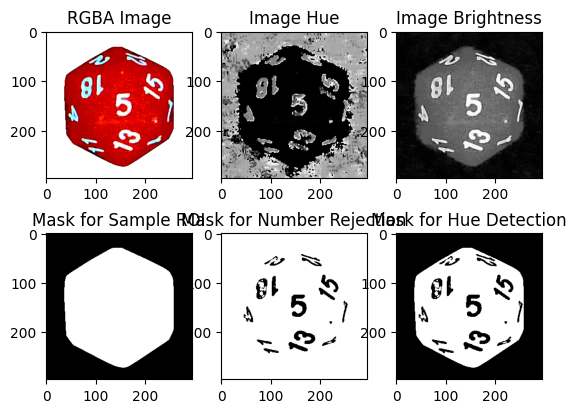

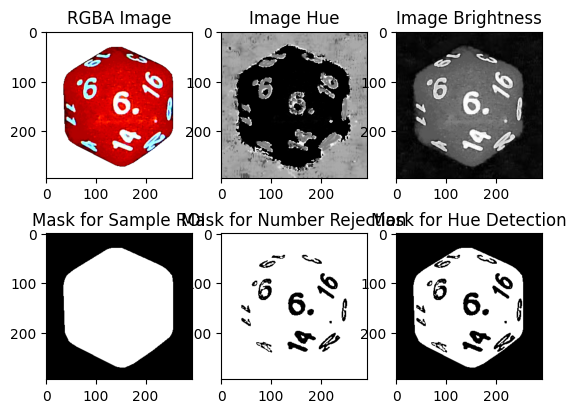

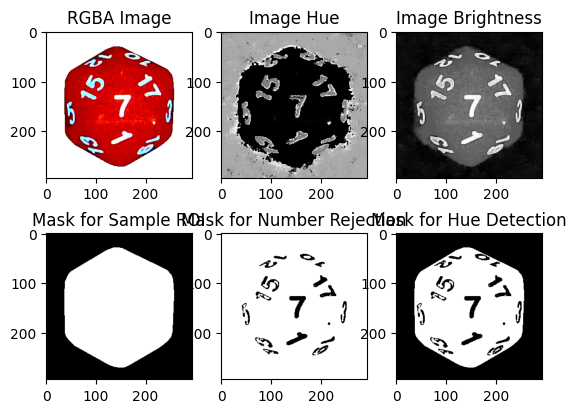

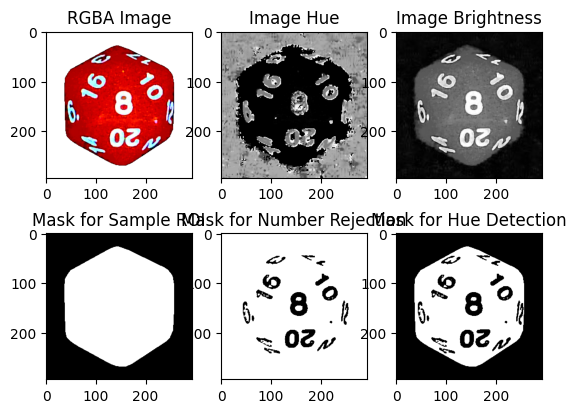

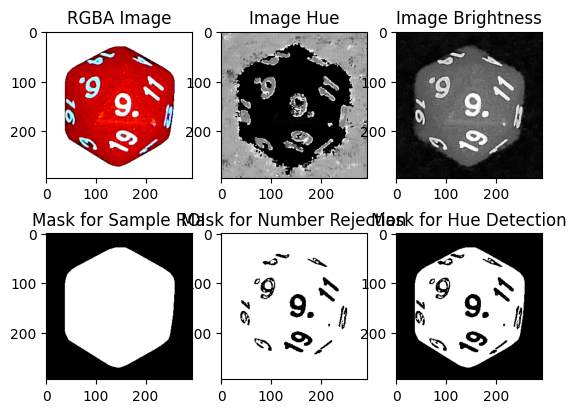

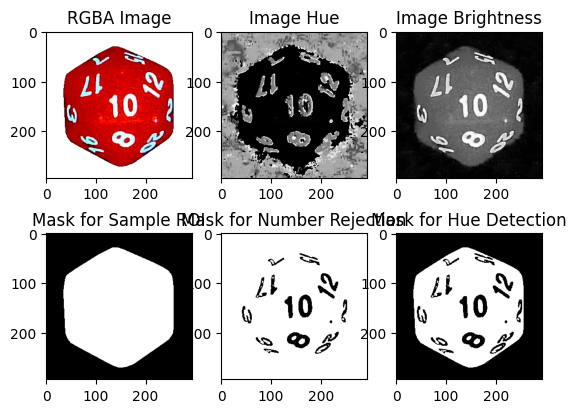

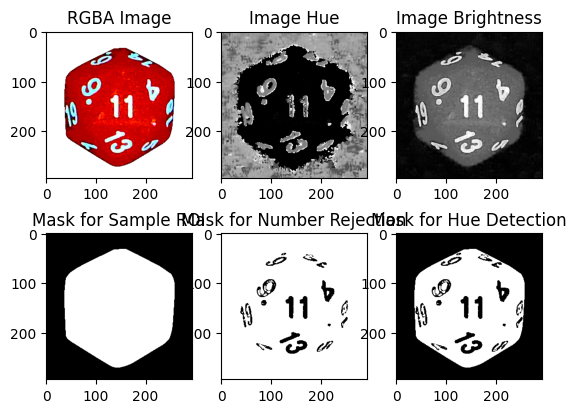

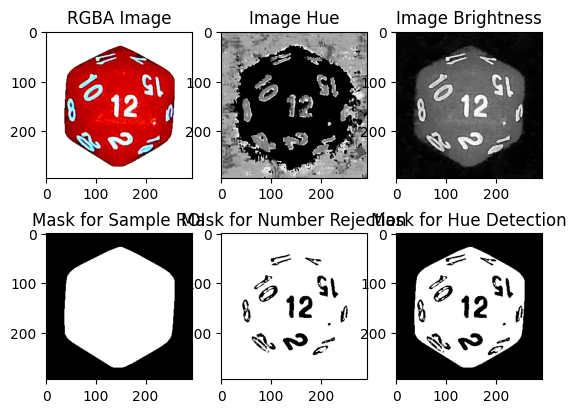

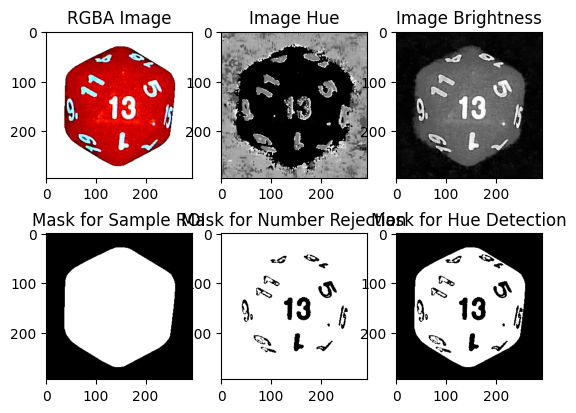

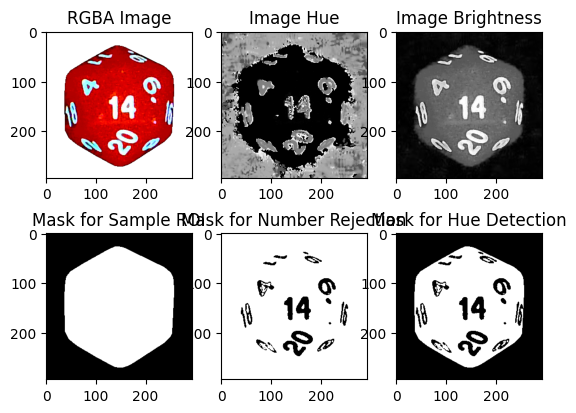

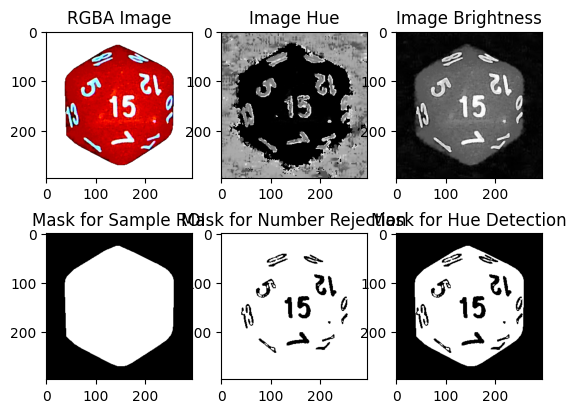

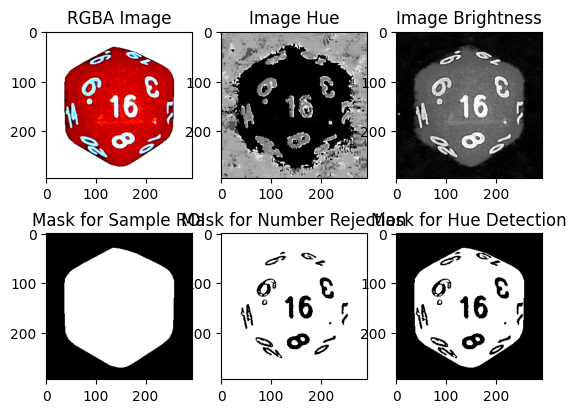

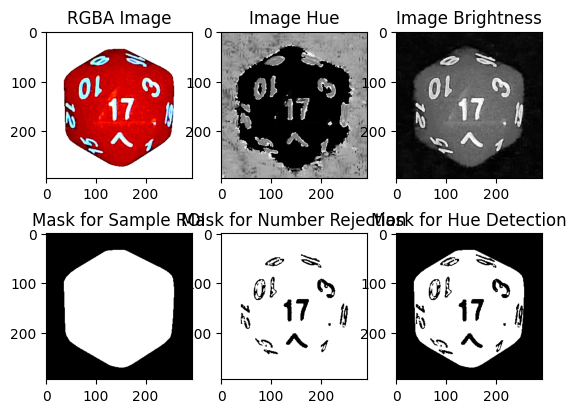

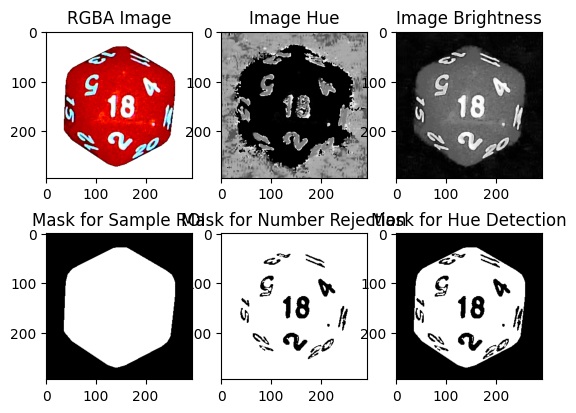

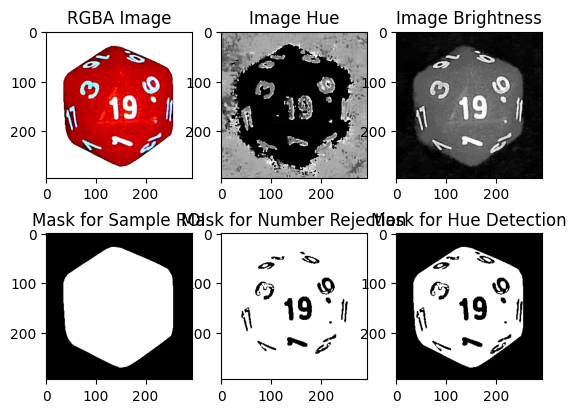

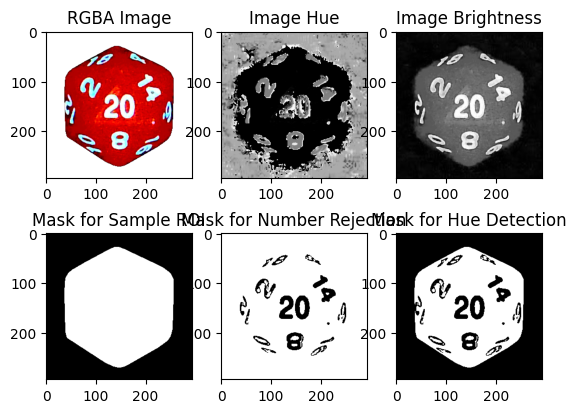

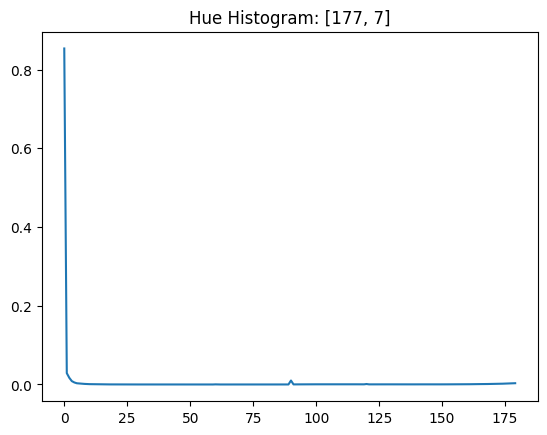

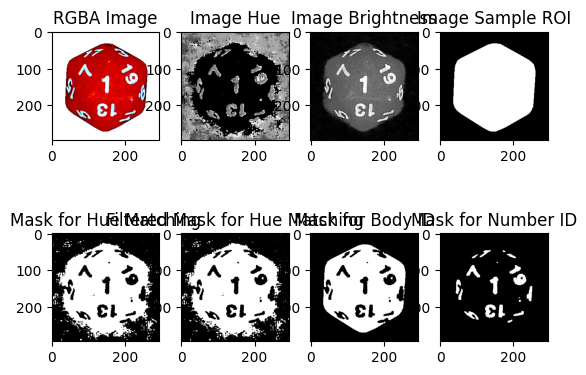

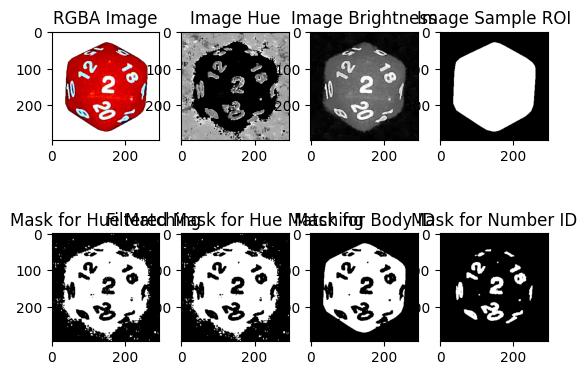

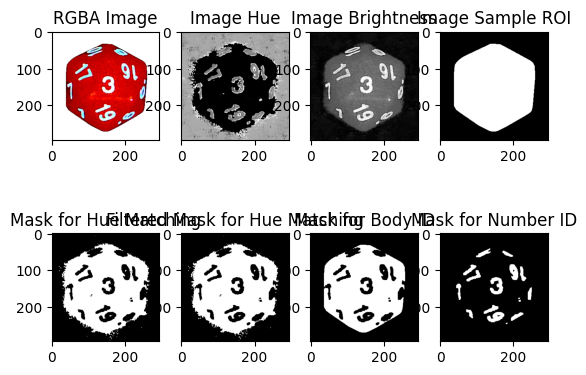

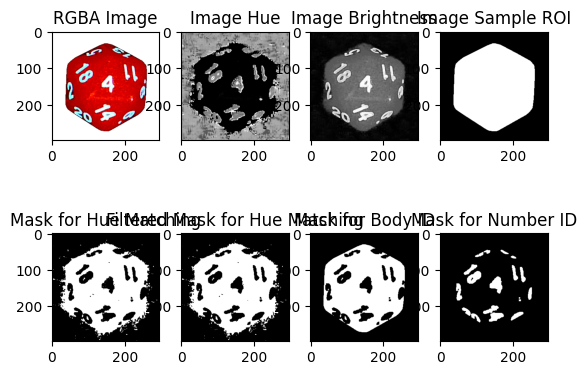

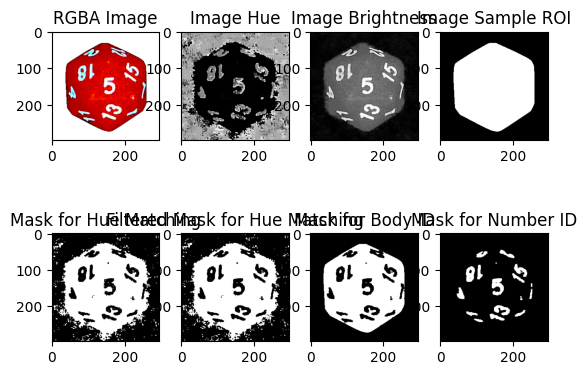

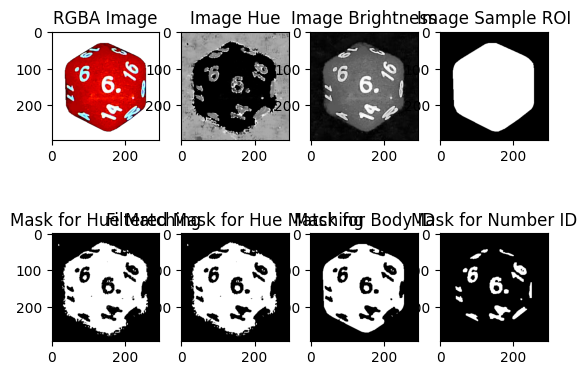

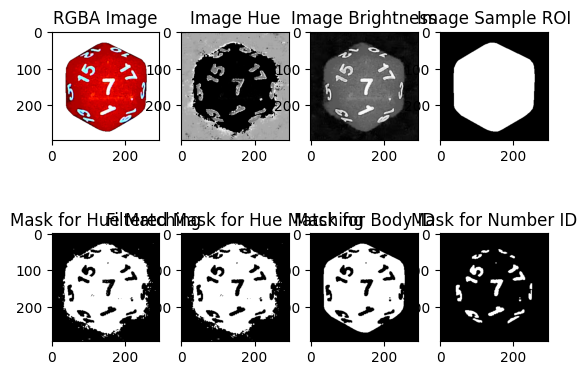

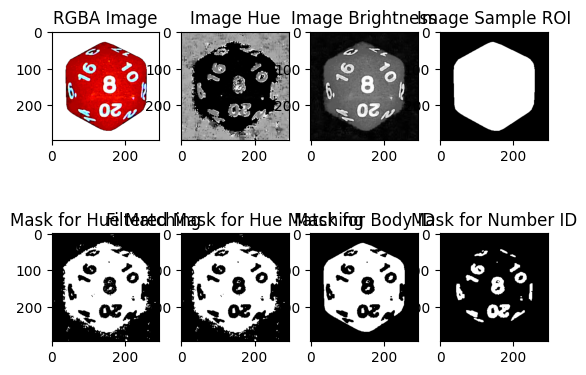

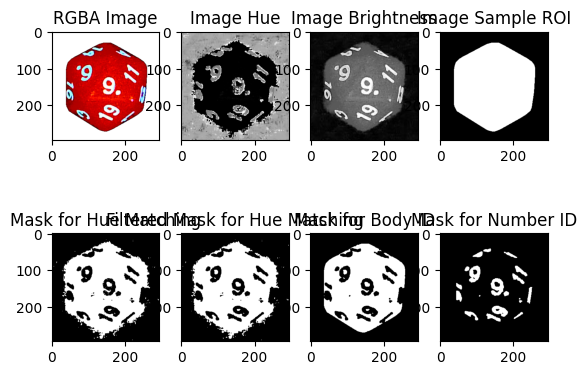

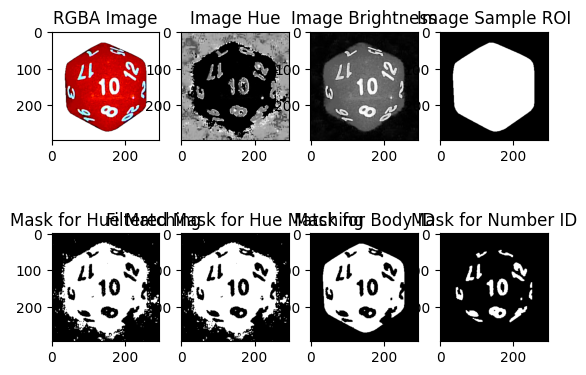

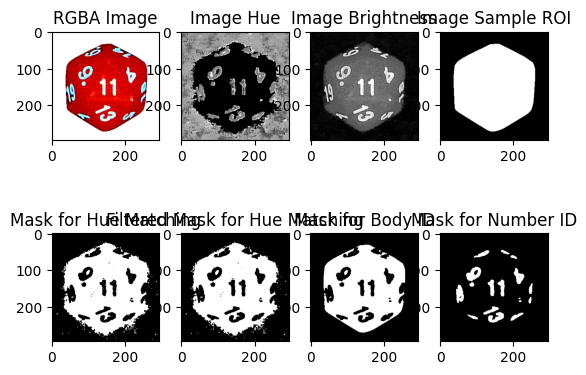

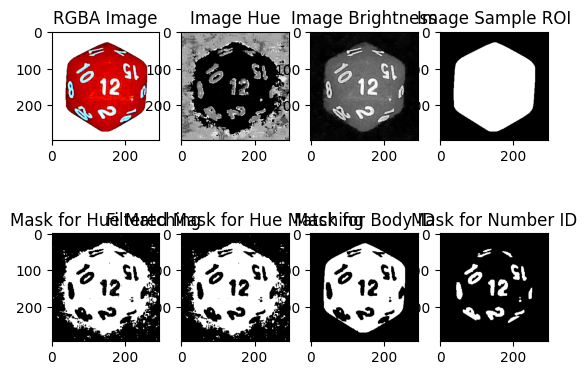

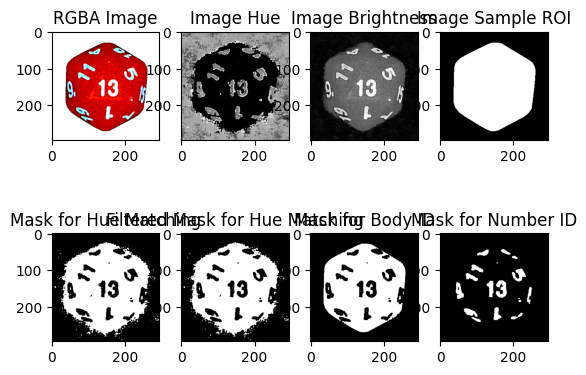

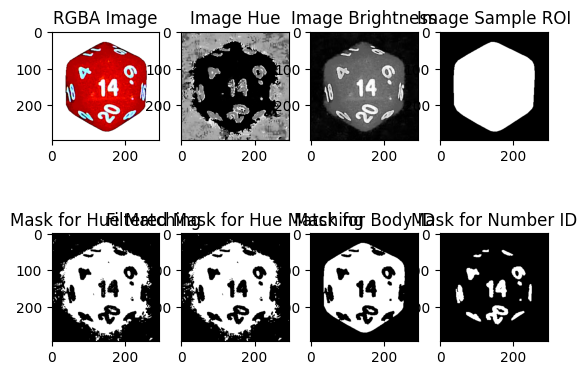

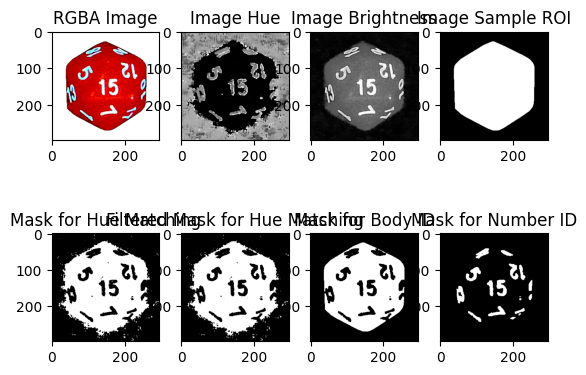

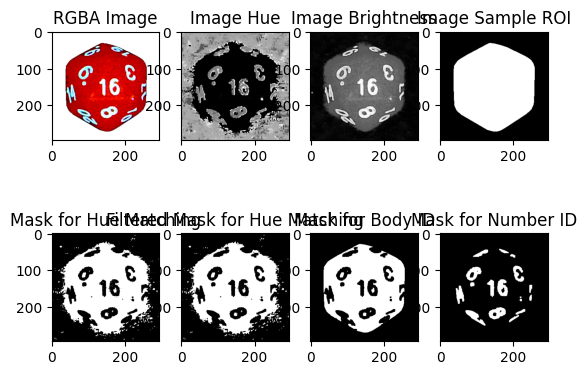

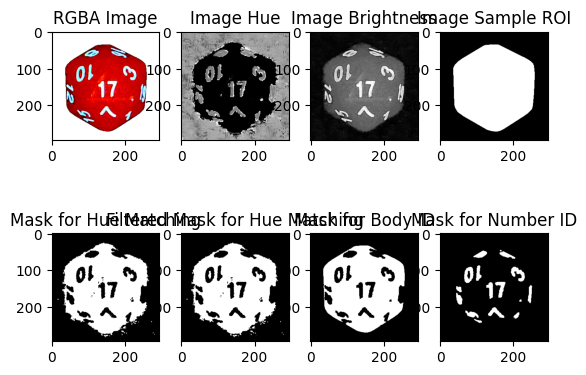

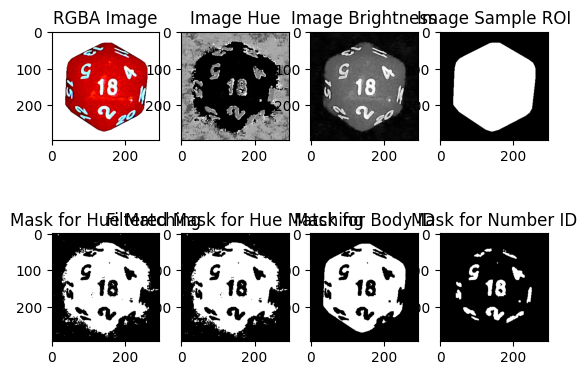

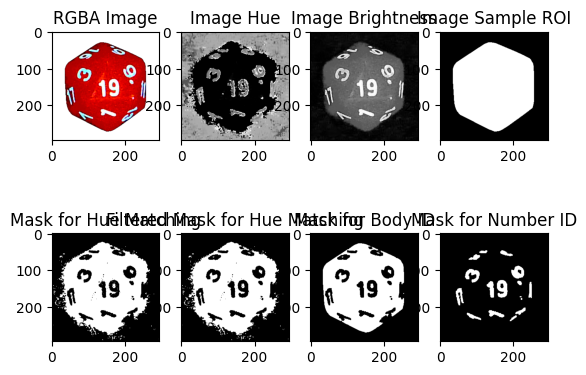

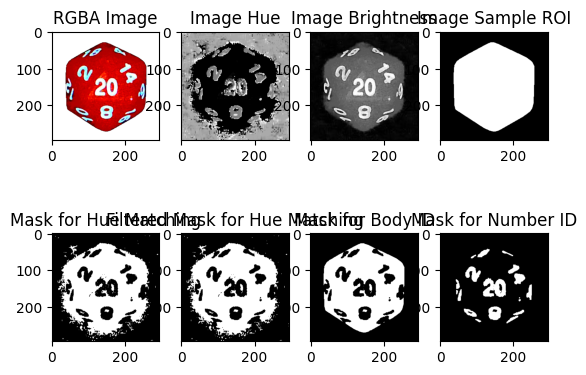

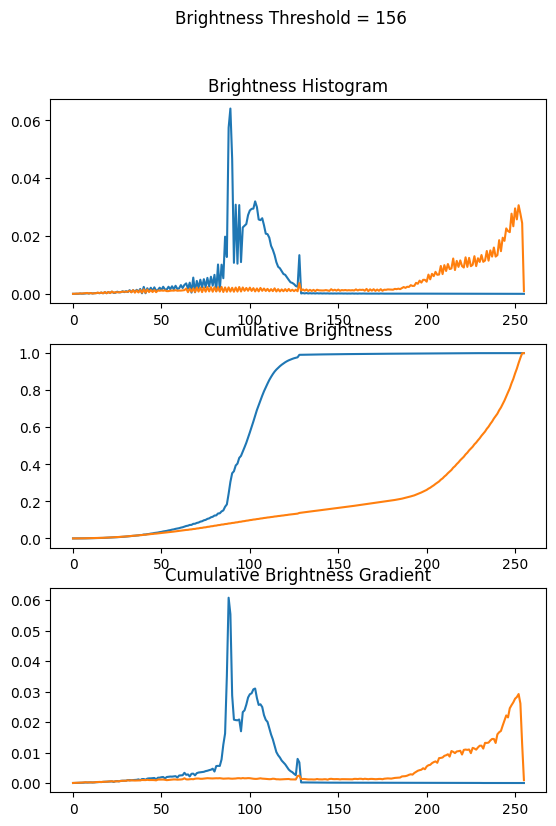

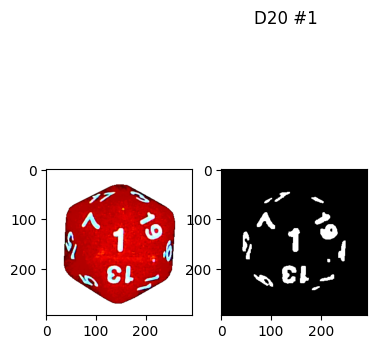

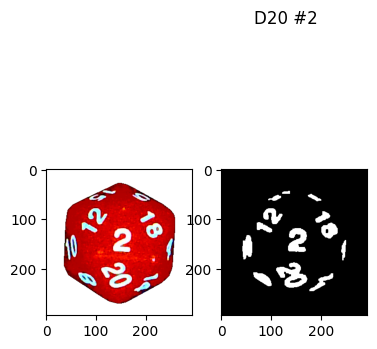

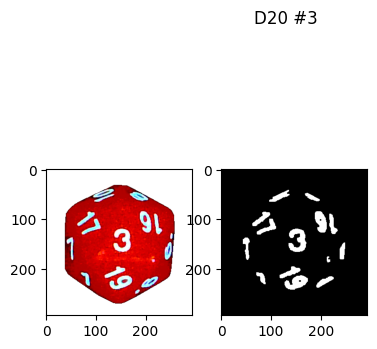

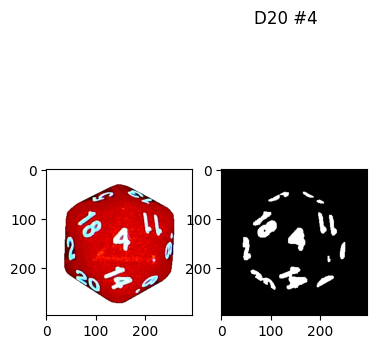

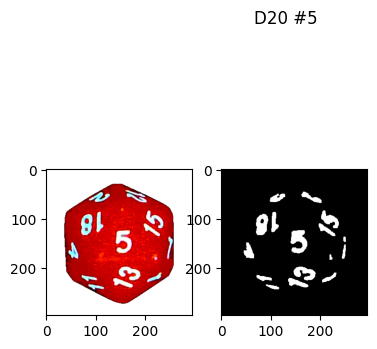

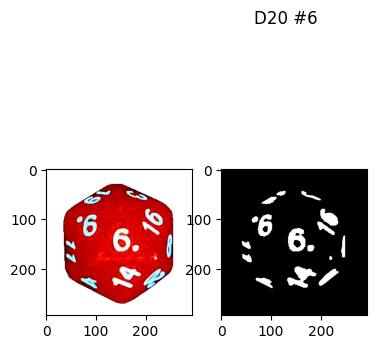

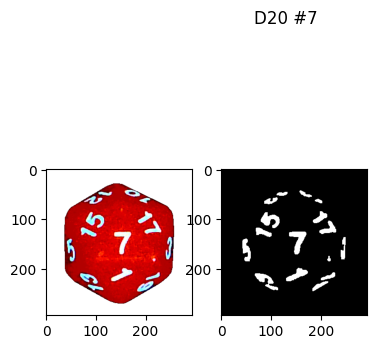

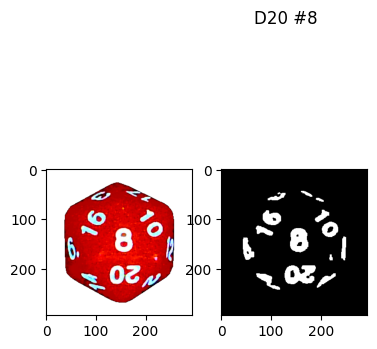

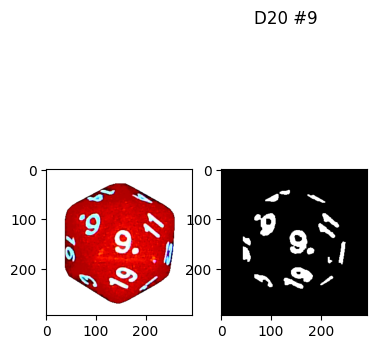

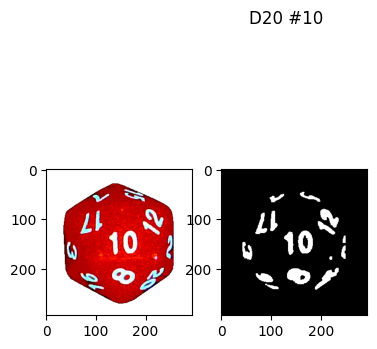

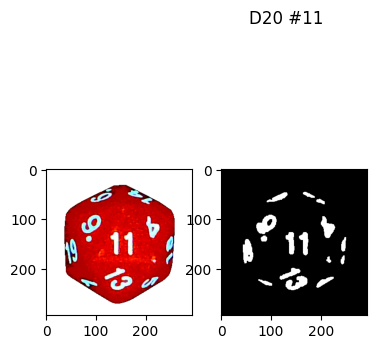

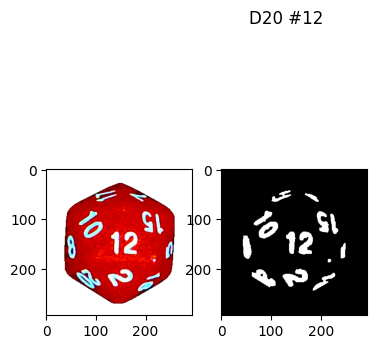

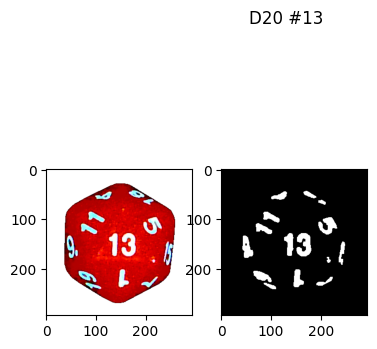

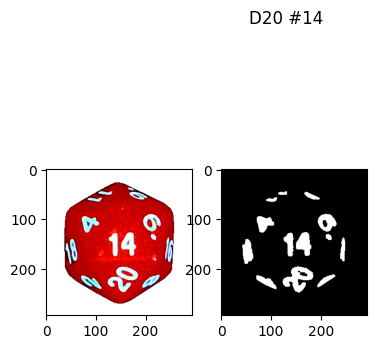

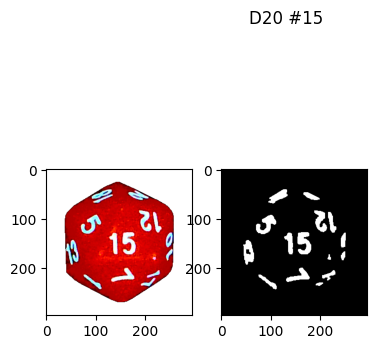

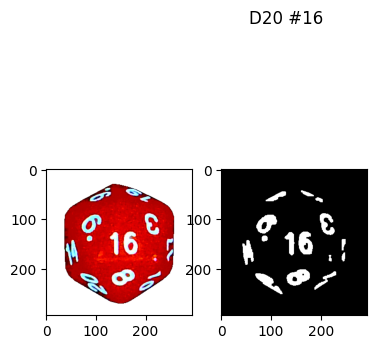

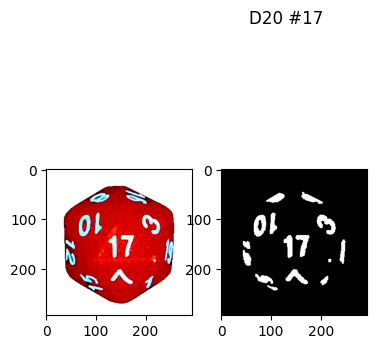

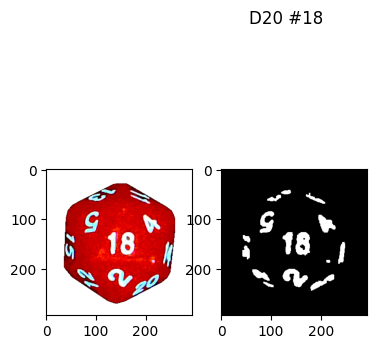

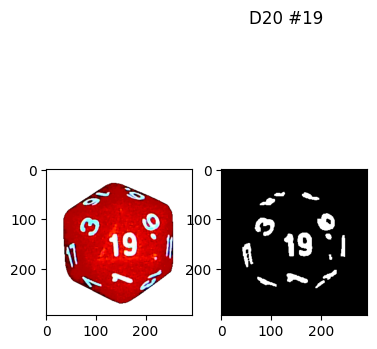

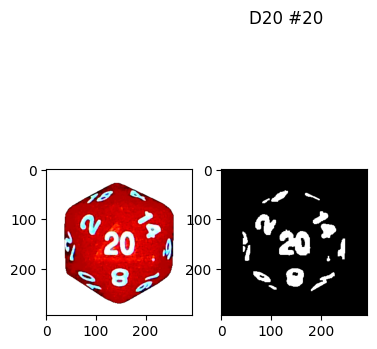

In [3]:
dieset = DieSet.create_common_die_set_from_images(file_template,names=[4,6,8,10,12,20,100],roi_mask=roi_mask,log_level=LOG_LEVEL_INFO)
#dieset = DieSet.create_common_die_set_from_images(file_template,names=[20],roi_mask=roi_mask,log_level=LOG_LEVEL_INFO)
dieset.view_die_color_space()
for die_name, die in dieset.dies.items():
    die.calculate_imaging_settings(LOG_LEVEL_DEBUG)
    for face_value, die_face in die.faces.items():
        for s in die_face.samples:
            plt.subplot(1,3,1)
            plt.imshow(s.image)
            plt.subplot(1,3,2)
            plt.imshow(s.keypoint_image, cmap='gray')
            
            plt.suptitle("D%s #%s"%(die_name,face_value))
            plt.show()